Importando as bibliotecas necessárias

In [2]:
import numpy as np
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import os

Montando o drive e importando algumas músicas


In [3]:
!git clone https://github.com/andryll/MGR-IC.git

Mounted at /content/drive
Cloning into 'MGR-IC'...
remote: Enumerating objects: 1008, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 1008 (delta 0), reused 9 (delta 0), pack-reused 999
Receiving objects: 100% (1008/1008), 1.12 GiB | 31.62 MiB/s, done.
Updating files: 100% (1003/1003), done.


In [ ]:
dir_path = '/content/MGR-IC/songs/blues/'

files = os.listdir(dir_path)

songs = []
for f in files:
  print(f)
  songs.append(librosa.load(os.path.join(dir_path, f), sr=44100, mono = True))

sr = 44100

In [ ]:
songs

In [64]:
ipd.Audio(songs[1][0],rate = sr)

# Extração das Features
### Time Domain Features (TDF)


> Zero Crossing Rate

> Root Mean Square Energy



### Frequency Domain Features (FDF)

> MFCC

> Spectral Centroid

> Spectral Rolloff

In [61]:
# Extraindo inicialmente a ZCR da primeira música (song0)
#   > Usando frame length 2048, hop length 512 e centralizando o feixe

zcrlist = []
rmslist = []
mfcclist = []
sctoidlist = []
srlofflist = []

for i in songs:
  zcr = librosa.feature.zero_crossing_rate(i[0], frame_length = 2048, hop_length = 512, center = True)
  rms = librosa.feature.rms(y=i[0], frame_length = 2048, hop_length = 512, center = True)
  mfcc = librosa.feature.mfcc(y=i[0], sr=sr)
  sctoid = librosa.feature.spectral_centroid(y=i[0], sr=sr, hop_length = 512, center = True)
  srloff = librosa.feature.spectral_rolloff(y=i[0], sr=sr, hop_length = 512, center = True)

  zcrlist.append(zcr)
  rmslist.append(rms)
  mfcclist.append(mfcc)
  sctoidlist.append(sctoid)
  srlofflist.append(srloff)


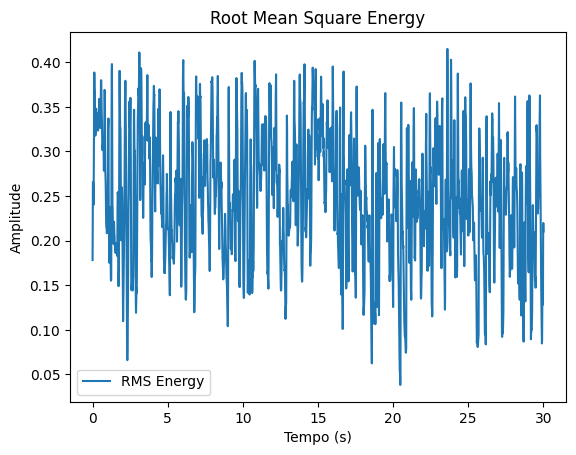

(1, 2586)


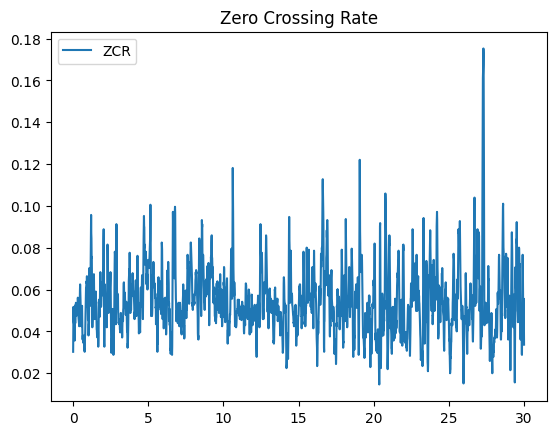

Text(0.5, 1.0, 'MFCC')

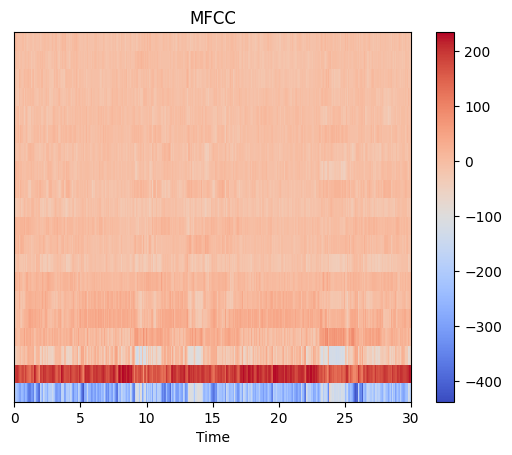

In [62]:
# Printando diagramas
i = 87 #índice da música da lista

#plot do rms
times = librosa.times_like(rmslist[i], sr=sr)
plt.plot(times, rmslist[i][0], label='RMS Energy')
plt.xticks = []
plt.legend()
plt.title('Root Mean Square Energy')
plt.ylabel('Amplitude')
plt.xlabel('Tempo (s)')
plt.show()

#plot do zcr
print(zcrlist[i].shape)
plt.plot(times, zcrlist[i][0], label = 'ZCR')
plt.legend()
plt.title('Zero Crossing Rate')
plt.show()

#plot do mfcc
img = librosa.display.specshow(mfcclist[0], x_axis='time', sr=sr)
plt.colorbar(img)
plt.title('MFCC')

#plot do spectral centroid
